In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train_df = pd.read_csv('twitter_training.csv', names=['id', 'entity', 'sentiment', 'text'])

train_df.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
test_df = pd.read_csv('twitter_validation.csv', names=['id', 'entity', 'sentiment', 'text'])

test_df.head()

,id,entity,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   int64 
 1   entity     1000 non-null   object
 2   sentiment  1000 non-null   object
 3   text       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [9]:
train_df.isna().sum()

id             0
entity         0
sentiment      0
text         686
dtype: int64

In [10]:
train_df = train_df.dropna()

In [11]:
train_df.isna().sum()

id           0
entity       0
sentiment    0
text         0
dtype: int64

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         73996 non-null  int64 
 1   entity     73996 non-null  object
 2   sentiment  73996 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [13]:
print(f'Training data : ', len(train_df))
print(f'Test data : ', len(test_df))

Training data :  73996
Test data :  1000


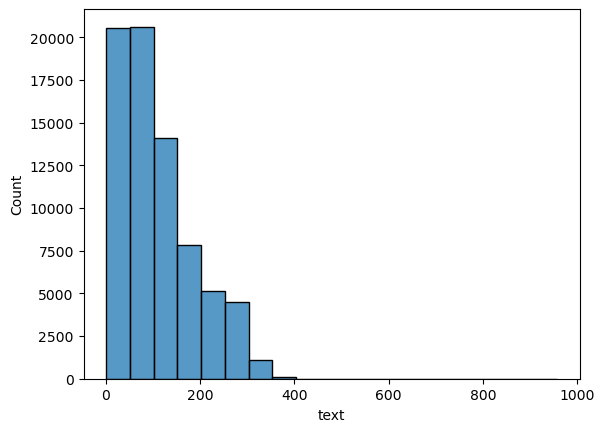

In [14]:
sns.histplot(train_df['text'].str.len(), binwidth=50)
plt.show()

In [15]:
sample_size = 3

train_df.groupby('sentiment').apply(lambda x: x.sample(sample_size))

/var/folders/mr/zpw8mcz14pj_gkyqs4k_zl4c0000gn/T/ipykernel_2022/848293623.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df.groupby('sentiment').apply(lambda x: x.sample(sample_size))


id                             entity   sentiment  \
sentiment                                                                
Irrelevant 43108  10198  PlayerUnknownsBattlegrounds(PUBG)  Irrelevant   
           674     2519                        Borderlands  Irrelevant   
           64344   7824                          MaddenNFL  Irrelevant   
Negative   12325   8518                              NBA2K    Negative   
           63755   7725                          MaddenNFL    Negative   
           59846   3457                           Facebook    Negative   
Neutral    3207    1757          CallOfDutyBlackopsColdWar     Neutral   
           24803   4659                             Google     Neutral   
           7953    9366                          Overwatch     Neutral   
Positive   22070   4177                              CS-GO    Positive   
           70078  10807               TomClancysGhostRecon    Positive   
           46169  11923                            Verizon    Positive   

                                                               text  
sentiment                                                            
Irrelevant 43108  That'as s how emotions got changed when tik - ...  
           674         My Herney friend is also a fantastic artist.  
           64344                                     I'm crying! .   
Negative   12325  @ NBA2K @ Ronnie2K HOW YES COME???????? How do...  
           63755  Yo @EAMaddenNFL I’ve teased you for little bit...  
           59846               June 2020......... Facebook is cool!  
Neutral    3207   I like Black Ops Cold Case at it’s core. Way b...  
           24803  United League Go on! Get Divine Base Rank S! e...  
           7953           “F-follow the Whores behind Overwatch...”  
Positive   22070  To all the people who want to play VALORANT an...  
           70078  No no no stuff that ’ s kinda cool, I ’ ve got...  
           46169                                                out

In [16]:
labels = list(train_df['sentiment'].unique())
id2label = {k:v for k, v in enumerate(labels)}
label2id = {v:k for k, v in enumerate(labels)}

print(labels, id2label, label2id)

['Positive', 'Neutral', 'Negative', 'Irrelevant'] {0: 'Positive', 1: 'Neutral', 2: 'Negative', 3: 'Irrelevant'} {'Positive': 0, 'Neutral': 1, 'Negative': 2, 'Irrelevant': 3}


In [17]:
train_df['label'] = train_df['sentiment'].map(label2id)
test_df['label'] = test_df['sentiment'].map(label2id)

train_df.head()

,id,entity,sentiment,text,label
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0


In [18]:
# 데이터 분리
train = train_df.sample(frac=0.9, random_state=42)
valid = train_df.drop(train.index)

In [19]:
train.head()

,id,entity,sentiment,text,label
61413,4926,GrandTheftAuto(GTA),Irrelevant,Looks to me like he failed to check out the wa...,3
44887,11709,Verizon,Irrelevant,"Wow, it takes all sorts of crazy people out th...",3
73662,9020,Nvidia,Neutral,Nvidia Unveils The World’s Fastest Gaming Moni...,1
36694,8295,Microsoft,Neutral,Huge radio play here. Reinvention / Corporate ...,1
2308,1604,CallOfDutyBlackopsColdWar,Negative,SO I HAPPY WHO ABOUT THIS.,2


In [20]:
valid.head()

,id,entity,sentiment,text,label
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0
28,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...,2
55,2410,Borderlands,Negative,"Why, like every man in border countries, have ...",2
60,2411,Borderlands,Neutral,. . [,1
67,2412,Borderlands,Positive,I will finish Borderlands 2 today. I have some...,0


In [21]:
from datasets import Dataset

train_ds = Dataset.from_pandas(train)
valid_ds = Dataset.from_pandas(valid)
test_ds = Dataset.from_pandas(test_df)

train_ds, valid_ds, test_ds

(Dataset({
     features: ['id', 'entity', 'sentiment', 'text', 'label', '__index_level_0__'],
     num_rows: 66596
 }),
 Dataset({
     features: ['id', 'entity', 'sentiment', 'text', 'label', '__index_level_0__'],
     num_rows: 7400
 }),
 Dataset({
     features: ['id', 'entity', 'sentiment', 'text', 'label'],
     num_rows: 1000
 }))

In [22]:
# 토큰화
from transformers import AutoTokenizer
# https://huggingface.co/welcome
model_name = 'cardiffnlp/twitter-roberta-base-sentiment-latest' # hugging face 모델
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [23]:
from datasets import load_metric

# Load_metric : Hugging Face Datasets 라이브러리에서 평가지표 로드
accuracy = load_metric('accuracy', trust_remote_code=True)

# 정확도 계산 함수
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

/var/folders/mr/zpw8mcz14pj_gkyqs4k_zl4c0000gn/T/ipykernel_2022/1858184417.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy = load_metric('accuracy', trust_remote_code=True)


In [24]:
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, max_length=128)

train_ds = train_ds.map(preprocess_function, batched=True)
valid_ds = valid_ds.map(preprocess_function, batched=True)
test_ds = test_ds.map(preprocess_function, batched=True)

Map:   0%|          | 0/66596 [00:00<?, ? examples/s]

Map:   0%|          | 0/7400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [25]:
train_ds

Dataset({
    features: ['id', 'entity', 'sentiment', 'text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 66596
})

In [26]:
valid_ds

Dataset({
    features: ['id', 'entity', 'sentiment', 'text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 7400
})

In [27]:
test_ds

Dataset({
    features: ['id', 'entity', 'sentiment', 'text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 1000
})

In [28]:
# padding
from transformers import DataCollatorWithPadding # 패딩을 자동으로 처리

# 사전 훈련된 tokenizer와 함께 입력 텍스트를 토큰화하고 필요에 따라 추가적으로 패딩을 처리한다.
data_collator = DataCollatorWithPadding(tokenizer=tokenizer) 

In [29]:
from transformers import TFAutoModelForSequenceClassification, TrainingArguments, Trainer

In [30]:
# TFAutoModelForSequenceClassification : 사전 훈련된 모델을 다중 클래스 분류를 위해 초기화
# TrainingArguments : 모델에 필요한 하이퍼파라미터들을 설정
# Trainer : 모델 훈련과 평가를 관리하는 데 사용
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# 사전 훈련된 모델을 로드
# model_name(가장 첫 인수) : 사전 훈련된 모델의 이름이나 경로
# num_labels : 분류할 레이블의 수
# label2id, id1label : 레이블ID와 이름 간의 매핑
# ignore_mismatched_sizes : 사전 훈련된 모델과 레이블이 다른 경우 새로운 레이블 수에 맞춰 새로운 분류헤드를 초기화한다.
model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels = len(labels), id2label = id2label, label2id = label2id, ignore_mismatched_sizes = True,
)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpo

In [31]:
# Hugging Face Transformers 라이브러리 모델 훈련 매개변수 설정
training_args = TrainingArguments(
    output_dir = 'twitter-sentiment-detector', # 훈련 후 모델과 체크포인트가 저장될 디렉토리
    learning_rate=2e-5, # 학습률
    per_device_train_batch_size=32, # train_batch_size
    per_device_eval_batch_size=32, # eval_batch_size
    num_train_epochs=10, # epochs
    weight_decay=0.01, # 가중치 감소
    eval_strategy='epoch', # 평가 전략, 각 에포크가 끝날 때 모델의 성능을 평가
    save_strategy='epoch', # 평가 전략, 각 에포크가 끝날 때 모델을 저장
    load_best_model_at_end=True, # 모델이 끝날 때 가장 성능이 좋은 모델을 로드할지
    report_to='none', # 로깅 시스템 보고
)

In [32]:
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset = train_ds,
    eval_dataset = valid_ds,
    tokenizer = tokenizer,
    data_collator = data_collator,
    compute_metrics = compute_metrics,
)

In [33]:
import torch

print(torch.cuda.is_available())  # CUDA GPU 사용 가능 여부 확인
print(torch.backends.mps.is_available())  # MPS GPU 사용 가능 여부 확인

False
True


In [34]:
texts = [
    "Another day, another “I feel like I’m being followed” experience.",
    "HAPPY SAINT PATRICK'S DAY! I'M A BIG FAN OF SAINT PATRICK'S DAY, I'M ALSO A BIG FAN OF GREEN THINGS, WHO WOULDN'T BE? :D"
]